<a href="https://colab.research.google.com/github/sbooeshaghi/seq.run/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
d = [
    {
      "nreads": 1,
      "compressed": 141,
      "uncompressed": 173
      },
    {
      "nreads": 5,
      "compressed": 276,
      "uncompressed": 865
      },
    {
      "nreads": 10,
      "compressed": 478,
      "uncompressed": 1731
      },
    {
      "nreads": 50,
      "compressed": 1849,
      "uncompressed": 8691
      },
    {
      "nreads": 100,
      "compressed": 3567,
      "uncompressed": 17437
      },
    {
      "nreads": 500,
      "compressed": 17469,
      "uncompressed": 87734
      },
    {
      "nreads": 1000,
      "compressed": 35051,
      "uncompressed": 175590
      },
    {
      "nreads": 5000,
      "compressed": 174345,
      "uncompressed": 882384
      },
    {
      "nreads": 10000,
      "compressed": 349412,
      "uncompressed": 1765980
      },
    {
      "nreads": 50000,
      "compressed": 1736585,
      "uncompressed": 8874328
      },
    {
      "nreads": 100000,
      "compressed": 3465367,
      "uncompressed": 17759901
      },
    {
      "nreads": 500000,
      "compressed": 17341704,
      "uncompressed": 89597915
      },
    {
      "nreads": 1000000,
      "compressed": 34671273,
      "uncompressed": 179306601
      },
    {
      "nreads": 5000000,
      "compressed": 173310980,
      "uncompressed": 901168202
      },
    {
      "nreads": 10000000,
      "compressed": 346591469,
      "uncompressed": 1803454121
      },
    {
      "nreads": 50000000,
      "compressed": 1741272734,
      "uncompressed": 9061963902
      },
    {
      "nreads": 100000000,
      "compressed": 3483555971,
      "uncompressed": 18135241134
      },
    {
      "nreads": 400000000,
      "compressed": 13571764148,
      "uncompressed": 72874759702
      },
]

In [4]:
def s(nreads, readLen, qscoreLen, headerLen, spacerLen, compressionRatio):
  estimatedSize = nreads * (readLength + qscoreLen + headerLen + spacerLen) * (1 / compressionRatio)
  return estimatedSize

basesPerRead = 62
readLength = basesPerRead + 1
qualityScoreLength = basesPerRead + 1
headerLength = 50 + 1
spacerLength = 1 + 1
compressionRatio = 5.2

In [5]:
df = pd.DataFrame(d, columns=["nreads","compressed","uncompressed"])

df["efficiency"] = df["compressed"] / df["uncompressed"]
df["ratio"] = df["uncompressed"] / df["compressed"]

df["psize"] = [s(i, readLength, qualityScoreLength, headerLength, spacerLength, compressionRatio) for i in df["nreads"]]
df["error"] = (df["psize"] - df["compressed"]) / df["compressed"]

In [6]:
df

,nreads,compressed,uncompressed,efficiency,ratio,psize,error
0,1,141,173,0.815029,1.226950,3.442308e+01,-0.755865
1,5,276,865,0.319075,3.134058,1.721154e+02,-0.376394
2,10,478,1731,0.276141,3.621339,3.442308e+02,-0.279852
3,50,1849,8691,0.212749,4.700379,1.721154e+03,-0.069143
4,100,3567,17437,0.204565,4.888422,3.442308e+03,-0.034957
5,500,17469,87734,0.199113,5.022268,1.721154e+04,-0.014738
6,1000,35051,175590,0.199618,5.009558,3.442308e+04,-0.017915
7,5000,174345,882384,0.197584,5.061137,1.721154e+05,-0.012789
8,10000,349412,1765980,0.197857,5.054148,3.442308e+05,-0.014828
9,50000,1736585,8874328,0.195686,5.110218,1.721154e+06,-0.008886


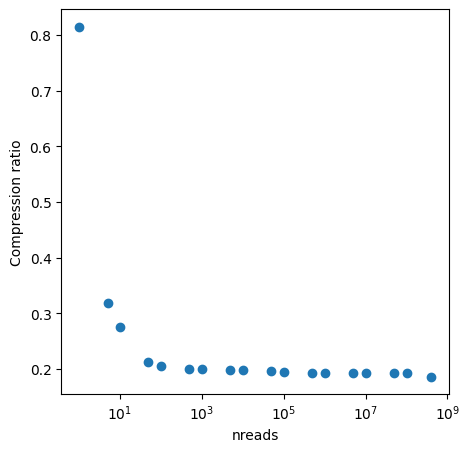

In [7]:
fig, ax = plt.subplots(figsize=(5,5))

x = df["nreads"]
y = df["efficiency"]
ax.scatter(x,y)
ax.set(**{
    "xlabel": "nreads",
    "ylabel": "Compression ratio",
    "xscale": "log",
})

fig.show()

In [8]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Define the exponential decay function
def exponential_decay(x, a, b, c):
    return a * np.exp(-b * x) + c


# Fit the exponential decay function to the data
x_data = np.log(df["nreads"])
y_data = df["efficiency"]
popt, pcov = curve_fit(exponential_decay, x_data, y_data)

# Extract the optimized parameters
a_opt, b_opt, c_opt = popt

# Generate the fitted curve
x_fit = np.linspace(0, max(x_data), 100)
y_fit = exponential_decay(x_fit, a_opt, b_opt, c_opt)


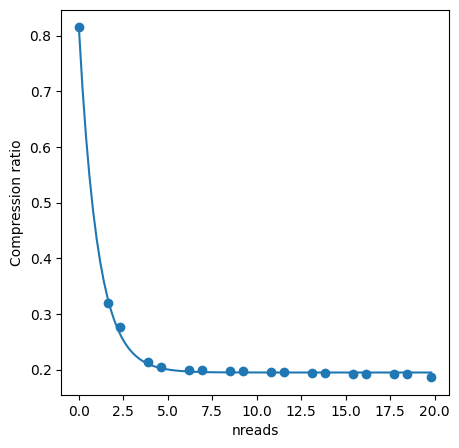

In [14]:
fig, ax = plt.subplots(figsize=(5,5))

ax.plot(x_fit,y_fit)

x = np.log(df["nreads"])
y = df["efficiency"]
ax.scatter(x,y)
ax.set(**{
    "xlabel": "nreads",
    "ylabel": "Compression ratio",
})


fig.show()

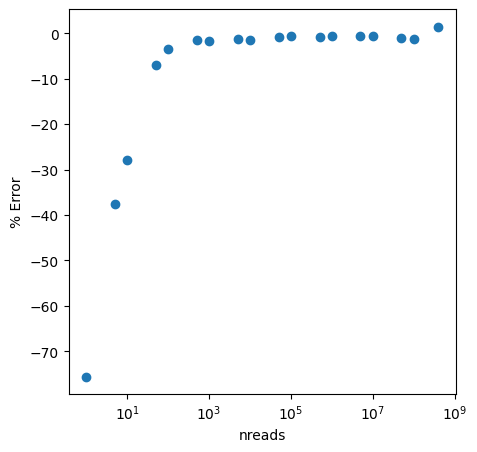

In [17]:
fig, ax = plt.subplots(figsize=(5,5))

x = df["nreads"]
y = df["error"]*100
ax.scatter(x,y)

ax.set(**{
    "xlabel": "nreads",
    "ylabel": "% Error",
    "xscale": "log"
})

fig.show()

In [13]:
df.query("nreads > 1e5")["ratio"].mean()

5.2173019468870026

In [18]:
df.query("nreads > 1e5")["error"].mean()*100

-0.5317055722239459